# XGBoost Classifier

This notebook uses XGBoost, a powerful gradient boosting framework.

In [1]:
import utils
import xgboost as xgb

# Load Data
X_train, y_train, X_test, y_test, class_names = utils.get_data_and_extract_features()

Loading features from cache...


Training XGBoost...

=== Evaluation: XGBoost ===
Accuracy: 83.75%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.79      0.75      0.77       435
      Banana       0.88      0.91      0.89       484
      Grapes       0.87      0.88      0.87       426
       Lemon       0.72      0.68      0.70       408
       Mango       0.72      0.70      0.71       346
      Orange       0.78      0.83      0.80       872
   Pineapple       0.87      0.87      0.87       373
 Pomegranate       0.88      0.89      0.89       787
  Strawberry       0.95      0.88      0.91       419
  Watermelon       0.90      0.89      0.90       527

    accuracy                           0.84      5077
   macro avg       0.84      0.83      0.83      5077
weighted avg       0.84      0.84      0.84      5077



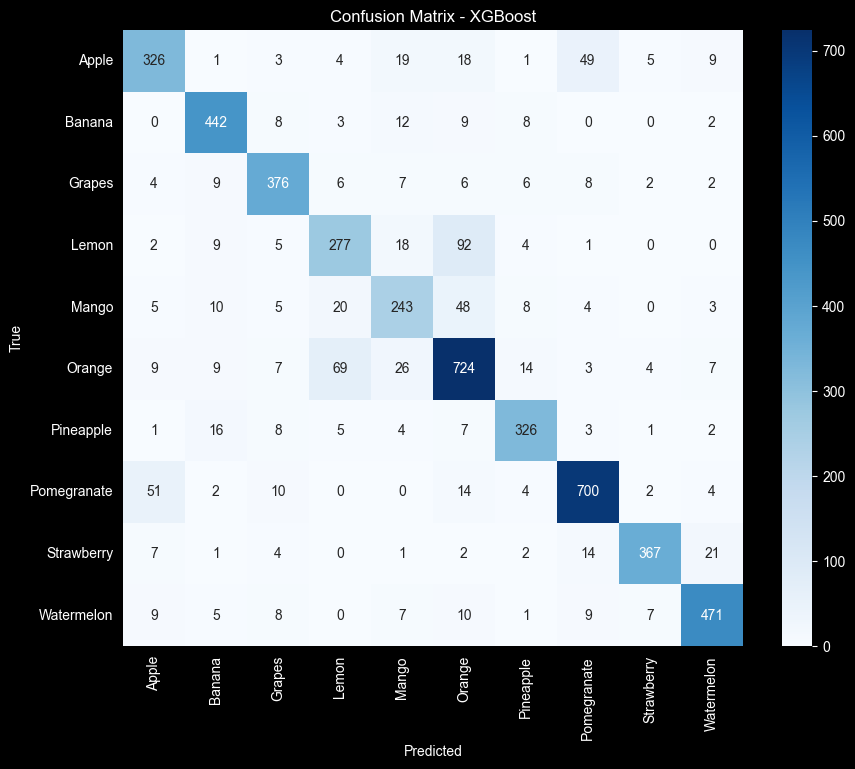

In [2]:
print("Training XGBoost...")
xgb_cls = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='mlogloss',
    n_jobs=-1,
    random_state=42
)

xgb_cls.fit(X_train, y_train)

utils.evaluate_model(xgb_cls, X_test, y_test, class_names, model_name="XGBoost")


=== Error Analysis: 5 Misclassified Samples ===


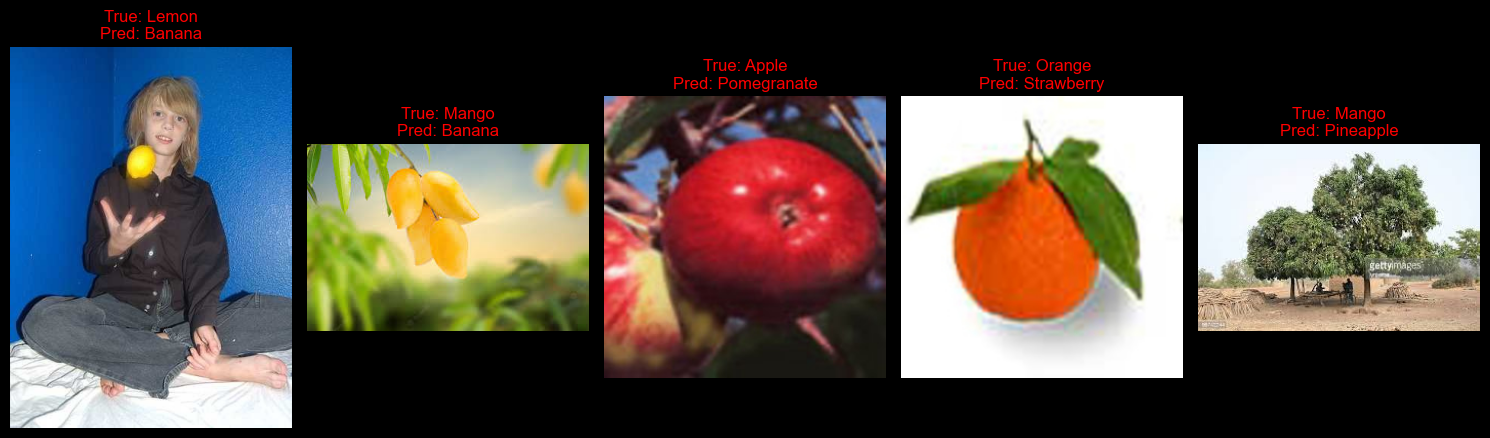

In [3]:
utils.visualize_model_errors(xgb_cls, X_test, y_test, class_names)

## Analysis & Insights

### Key Metrics
- **Accuracy**: 83.75%
- **Hyperparameters**: n_estimators=100, learning_rate=0.1, max_depth=6
- **Macro Average F1-Score**: 0.83
- **Weighted Average F1-Score**: 0.84
- Gradient boosting with default regularization

### Performance Analysis
- **Accuracy**: Medium (83.75%, upper end of 70-85% range)
- **Best Classes**:
  - Strawberry: 95% precision, 88% recall
  - Watermelon: 90% precision, 89% recall
  - Pomegranate: 88% precision, 89% recall
- **Worst Classes**:
  - Lemon: 72% precision, 68% recall (worst overall)
  - Mango: 72% precision, 70% recall
  - Apple: 79% precision, 75% recall

### Error Analysis
- **Confusion Pairs**:
  - Lemon → Orange: 92 misclassifications (most common error)
  - Orange → Lemon: 69 misclassifications (bidirectional)
  - Pomegranate → Apple: 51 misclassifications
  - Apple → Pomegranate: 49 misclassifications (bidirectional)
  - Mango → Orange: 48 misclassifications
- **Visual Insights**: XGBoost shows balanced bidirectional confusion between Lemon and Orange (161 total errors), suggesting the gradient boosting process learned symmetric decision boundaries rather than biasing toward one class. The Apple-Pomegranate confusion (100 total) indicates red-colored fruits remain challenging. Unlike Random Forest's asymmetric bias, XGBoost's sequential boosting appears to correct for class imbalances more effectively. The model achieves strong performance on visually distinctive fruits (Strawberry 95% precision) while maintaining reasonable balance across all classes.

### Conclusion
XGBoost achieves 83.75% accuracy, performing comparably to Linear SVM (83.28%) and slightly better than Random Forest (82.02%). The gradient boosting approach demonstrates more balanced error patterns than Random Forest, with symmetric Lemon-Orange confusions rather than strong directional bias. This represents solid performance for a boosted tree ensemble on high-dimensional features. The model's strength lies in its consistent performance across most classes (8 out of 10 classes above 75% F1-score), though citrus discrimination remains the primary weakness with 161 Lemon-Orange confusions. The results are typical for XGBoost on image features, showing good generalization without the extreme class bias seen in Random Forest. Further improvements could come from hyperparameter tuning (especially max_depth and learning_rate) or incorporating class weights to address the persistent citrus confusion challenge.
